# Fertilizer Recommendation Notebook

#### This notebook performs fertilizer recommendation based on environmental factors using various machine learning models.
#### It evaluates multiple models, selects the best one based on accuracy, and saves the trained model and scaler for future predictions.


## 1. Import Necessary Libraries


In [17]:
%pip install matplotlib seaborn
%pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle # Import pickle to save and load models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 2. Importing Data

In [18]:
# ## 2. Load the Dataset

# # Make sure to upload the 'Crop_recommendation.csv' dataset to your Kaggle or Google Colab environment.
# # The path below assumes the dataset is in the default input directory on Kaggle.
# try:
#     fertilizer_df = pd.read_csv('/kaggle/input/crop-fertilizer-dataset/fertitlizer_recommendation.csv')
# except FileNotFoundError:
#     print("Dataset not found. Please ensure 'Fertilizer_recommendation.csv' is in the correct directory.")
#     # You might need to adjust the path for Google Colab or other environments
#     # For Google Colab, you can upload the file or mount your Google Drive
#     # from google.colab import files
#     # uploaded = files.upload()
#     # for fn in uploaded.keys():
#     #   print('User uploaded file "{name}" with length {length} bytes'.format(
#     #       name=fn, length=len(uploaded[fn])))
#     # import io
#     # crop_df = pd.read_csv(io.StringIO(uploaded['Crop_recommendation.csv'].decode('utf-8')))
try:
    fertilizer_df = pd.read_csv('fertitlizer_recommendation.csv')
except FileNotFoundError:
    print("Dataset not found. Please ensure 'Fertilizer_recommendation.csv' is in the correct directory.")


## 3. Data Exploration and Preprocessing


In [19]:
# Display the first few rows
print("First 5 rows of the dataset:")
fertilizer_df.head()

First 5 rows of the dataset:


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [20]:
# Check the shape of the dataset
print("\nShape of the dataset:", fertilizer_df.shape)


Shape of the dataset: (99, 9)


In [21]:
# Get basic info about the dataset
print("\nDataset Info:")
fertilizer_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [22]:
# Check for missing values
print("\nMissing values per column:")
print(fertilizer_df.isnull().sum())


Missing values per column:
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


In [23]:
# Check for duplicated values
print("\nNumber of duplicated rows:", fertilizer_df.duplicated().sum())


Number of duplicated rows: 0


In [24]:
# Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical features:")
fertilizer_df.describe(include=np.number)


Descriptive statistics for numerical features:


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [25]:
# Rename columns for consistency and easier access
fertilizer_df.columns = fertilizer_df.columns.str.lower().str.strip() # Added .str.strip() here
fertilizer_df.rename(columns={'temparature': 'temperature', 'soil type': 'soil_type', 'crop type': 'crop_type', 'fertilizer name': 'fertilizer_name'}, inplace=True)


In [26]:
# Check the distribution of categorical features
print("\nDistribution of Soil Types:")
print(fertilizer_df['soil_type'].value_counts())



Distribution of Soil Types:
soil_type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: count, dtype: int64


In [27]:

print("\nDistribution of Crop Types:")
print(fertilizer_df['crop_type'].value_counts())



Distribution of Crop Types:
crop_type
Sugarcane      13
Cotton         12
Millets        11
Pulses         10
Paddy          10
Wheat           9
Barley          7
Oil seeds       7
Tobacco         7
Ground Nuts     7
Maize           6
Name: count, dtype: int64


In [28]:

print("\nDistribution of Fertilizer Names:")
print(fertilizer_df['fertilizer_name'].value_counts())


Distribution of Fertilizer Names:
fertilizer_name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64


## 3. Exploring Data

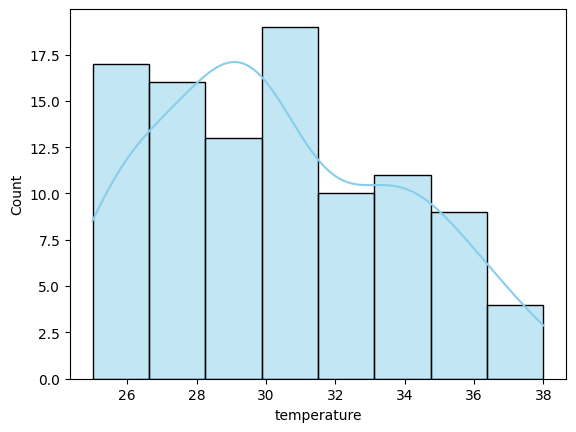

In [29]:

# check the distribution of the temperature column
sns.histplot(fertilizer_df['temperature'], kde=True, color = 'skyblue')
plt.show()

In [30]:

# Only select the numerical columns 
features = fertilizer_df.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['temperature', 'humidity', 'moisture', 'nitrogen', 'potassium', 'phosphorous']


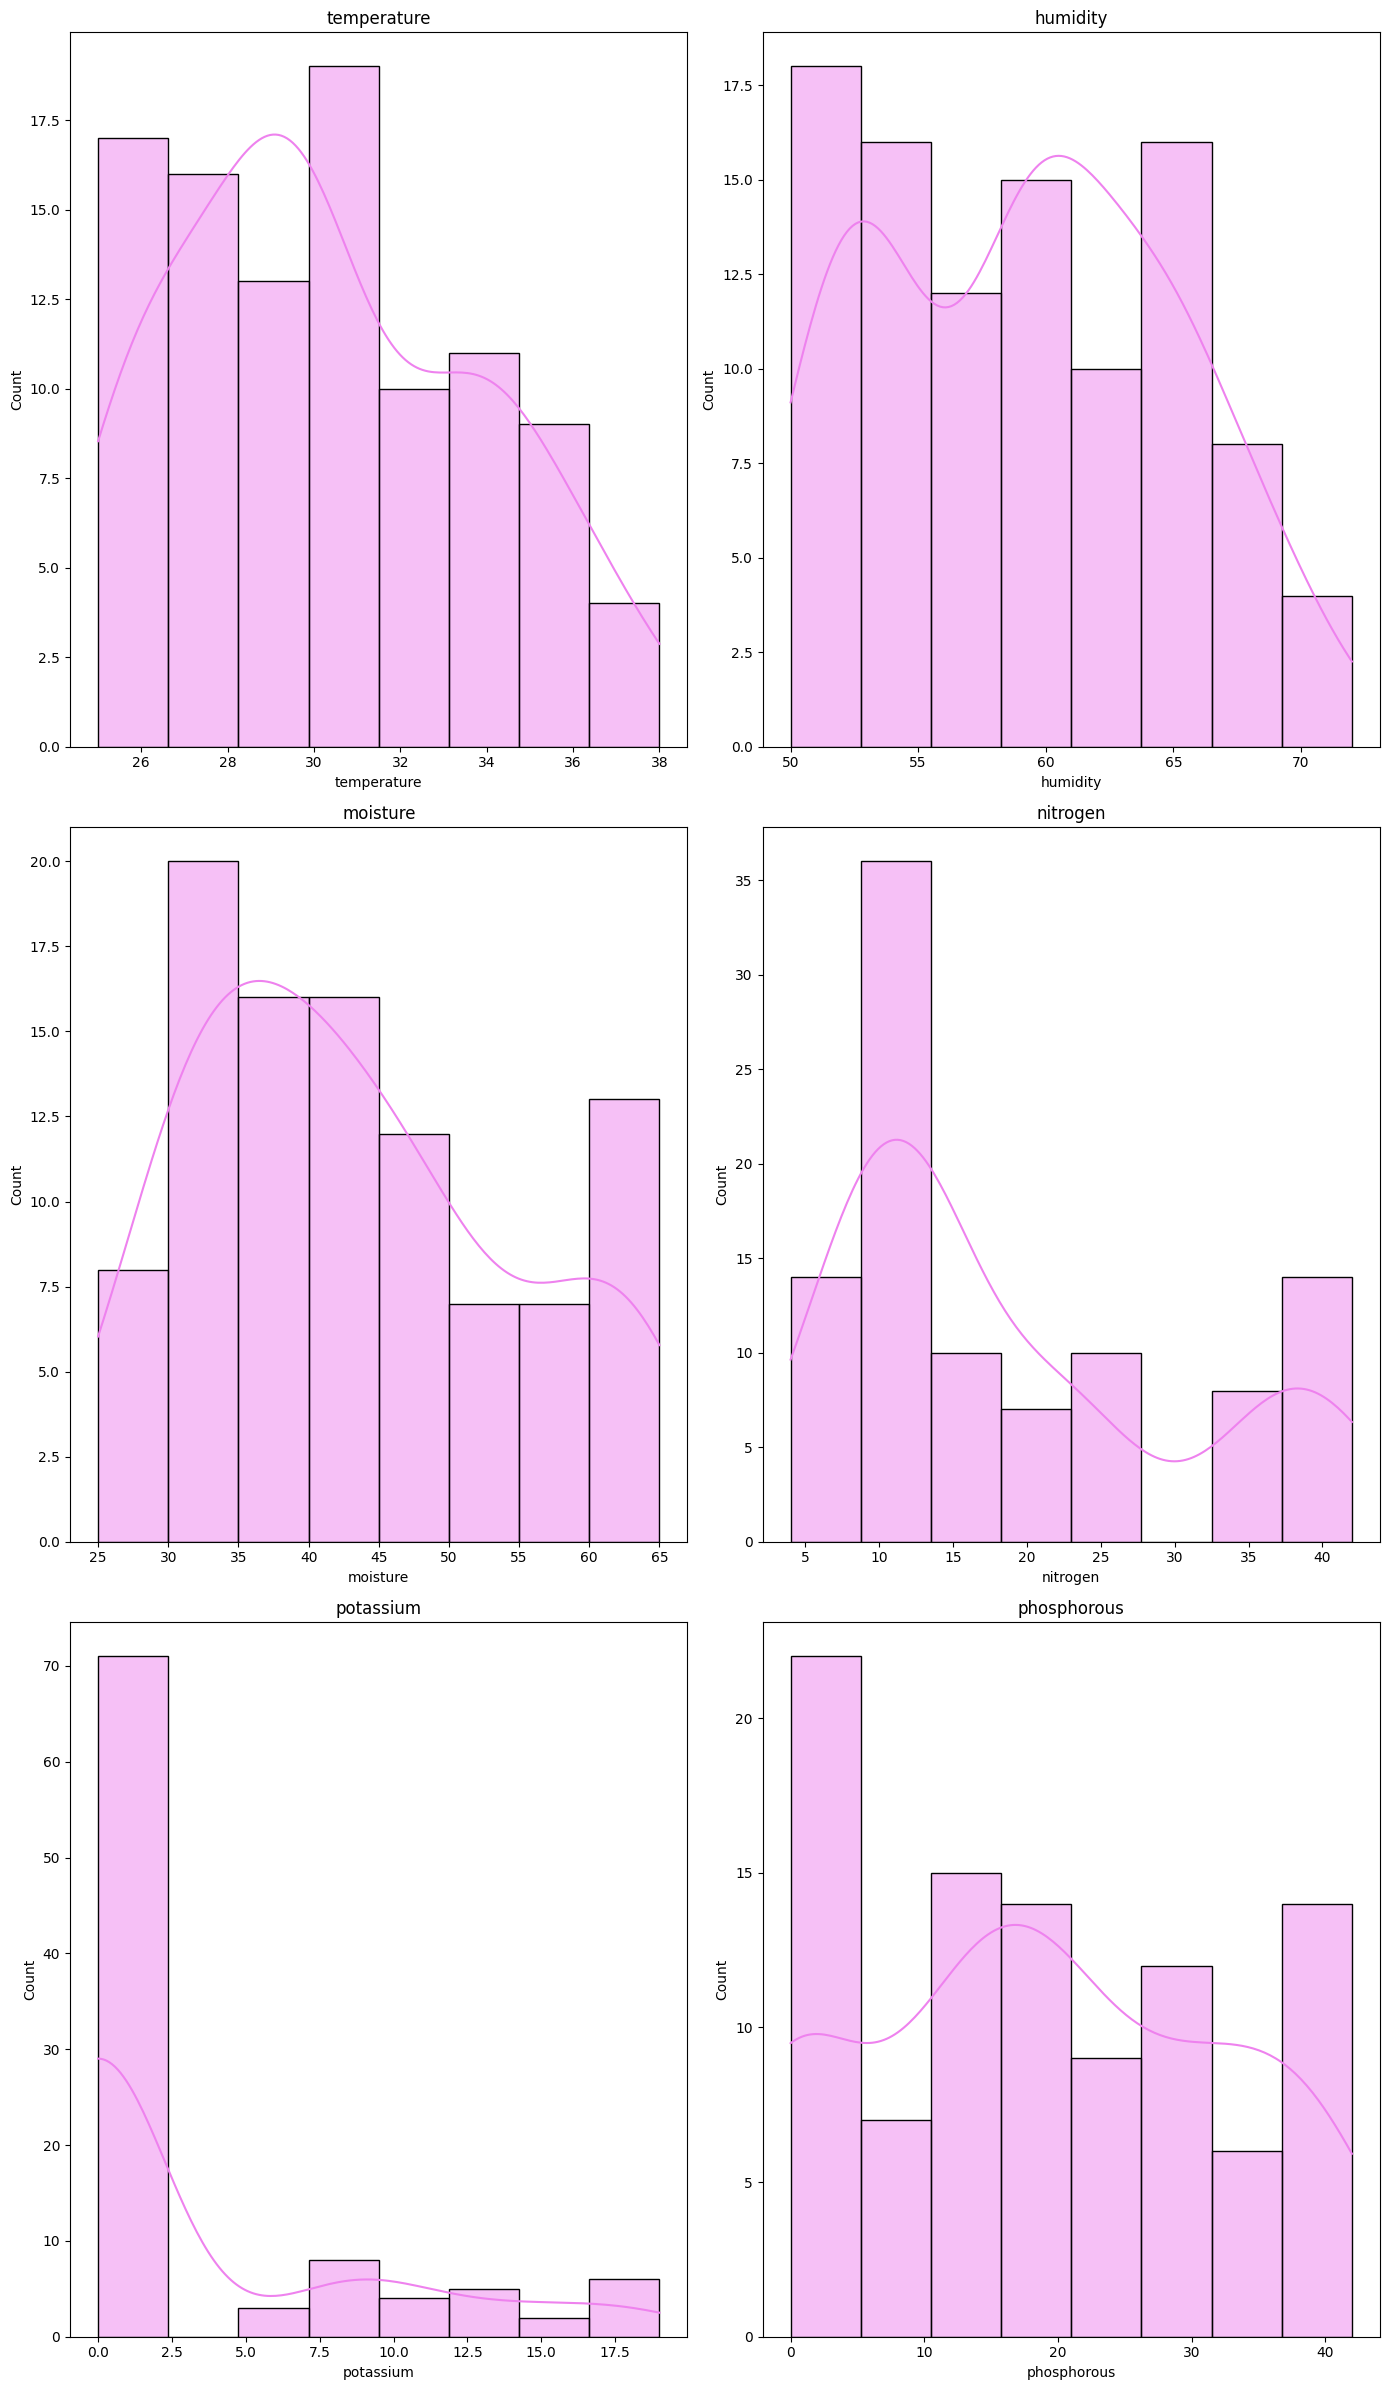

In [31]:
# Visualize the distribution of numerical features using histograms
# visualize the distribution of each feature
fig, ax = plt.subplots(3, 2, figsize=(14, 24))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer_df[i], ax=subplot, kde=True, color = 'violet')
    subplot.set_title(i)
plt.tight_layout()
plt.show()

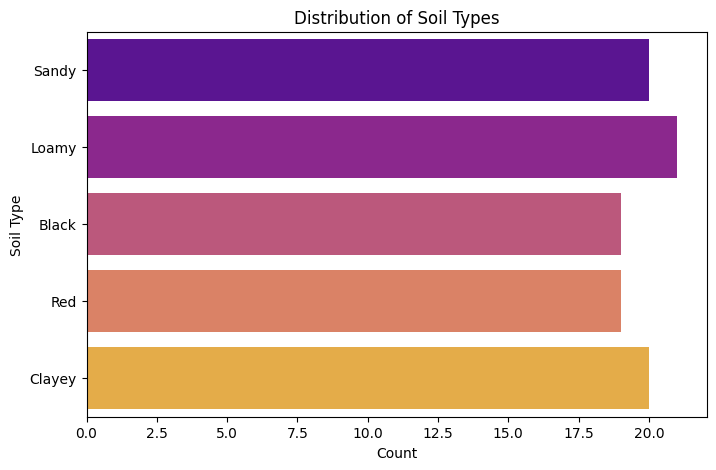

In [32]:
# Visualize the distribution of categorical features using countplots
plt.figure(figsize=(8, 5))
sns.countplot(data=fertilizer_df, y='soil_type', palette='plasma') # Using a different color palette
plt.title('Distribution of Soil Types')
plt.xlabel('Count')
plt.ylabel('Soil Type')
plt.show()

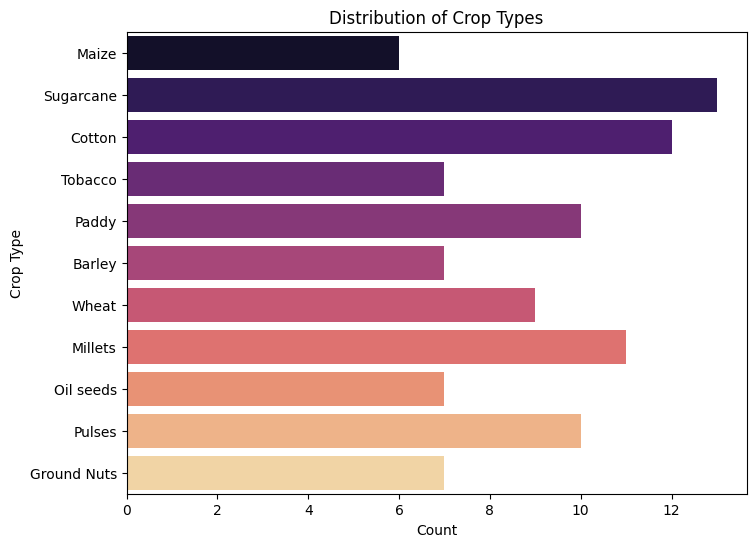

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=fertilizer_df, y='crop_type', palette='magma') # Using a different color palette
plt.title('Distribution of Crop Types')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.show()

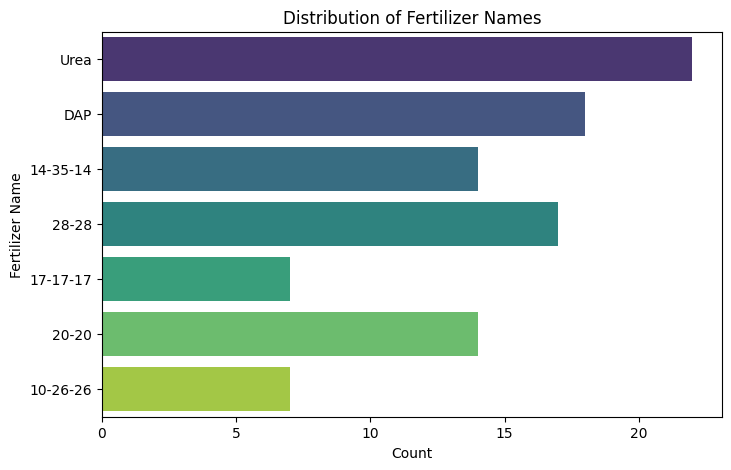

In [34]:

plt.figure(figsize=(8, 5))
sns.countplot(data=fertilizer_df, y='fertilizer_name', palette='viridis') # Using a different color palette
plt.title('Distribution of Fertilizer Names')
plt.xlabel('Count')
plt.ylabel('Fertilizer Name')
plt.show()

In [35]:
# Only select the numerical columns
fertilizer_numeric = fertilizer_df.select_dtypes(include=[np.number])
corr = fertilizer_numeric.corr()
corr

,temperature,humidity,moisture,nitrogen,potassium,phosphorous
temperature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


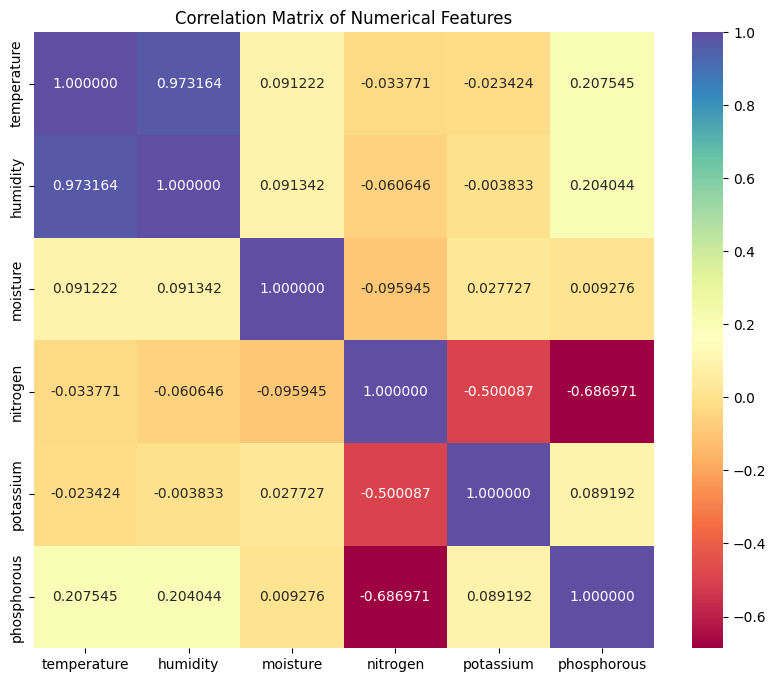

In [36]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cbar=True,cmap='Spectral', fmt=".6f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 4. Encoding

In [37]:

# Separate features (X) and target (y)
X = fertilizer_df.drop('fertilizer_name', axis=1)
y = fertilizer_df['fertilizer_name']

In [38]:
# Handle categorical features using one-hot encoding
X = pd.get_dummies(X, columns=['soil_type', 'crop_type'], drop_first=True)


In [39]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


## 5. Splitting and Scaling the Dataset

In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of y_train: {y_train_encoded.shape}")
print(f"Shape of x_test: {X_test.shape}")
print(f"Shape of y_test: {y_test_encoded.shape}")


Shape of x_train: (79, 20)
Shape of y_train: (79,)
Shape of x_test: (20, 20)
Shape of y_test: (20,)


In [41]:
# Scale the numerical features (excluding the one-hot encoded columns)
# Ensure the numerical features list matches the actual column names after preprocessing
numerical_features = ['temperature', 'humidity', 'moisture', 'nitrogen', 'potassium', 'phosphorous']
scaler = StandardScaler()
# Print columns to debug if error persists
# print("Columns in X_train before scaling:", X_train.columns)
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


## 6. Train and Evaluate Multiple Models


In [42]:
# Initialize multiple classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Tree": ExtraTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

accuracy_scores = {}

In [43]:
# Train and evaluate each model
print("\nTraining and evaluating models:")
for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.6f}")


Training and evaluating models:
Logistic Regression Accuracy: 0.950000
Naive Bayes Accuracy: 0.500000
SVM Accuracy: 0.850000
KNeighbors Classifier Accuracy: 0.650000
Decision Tree Accuracy: 1.000000
Extra Tree Accuracy: 0.850000
Random Forest Accuracy: 0.950000
Bagging Classifier Accuracy: 1.000000
Gradient Boosting Accuracy: 0.950000
AdaBoost Classifier Accuracy: 0.350000


## 7. Select the Best Model


In [44]:
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]

print(f"\nBest performing model: {best_model_name} with accuracy {accuracy_scores[best_model_name]:.4f}")



Best performing model: Decision Tree with accuracy 1.0000


In [45]:
# Evaluate the best model in more detail
y_pred_best = best_model.predict(X_test)

# Get the unique labels present in the test set
unique_test_labels = np.unique(y_test_encoded)
# Get the corresponding target names using the label encoder
target_names_for_report = label_encoder.inverse_transform(unique_test_labels)

print(f"\nClassification Report for {best_model_name}:\n", classification_report(y_test_encoded, y_pred_best, target_names=target_names_for_report, labels=unique_test_labels)) # Added labels parameter



Classification Report for Decision Tree:
               precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



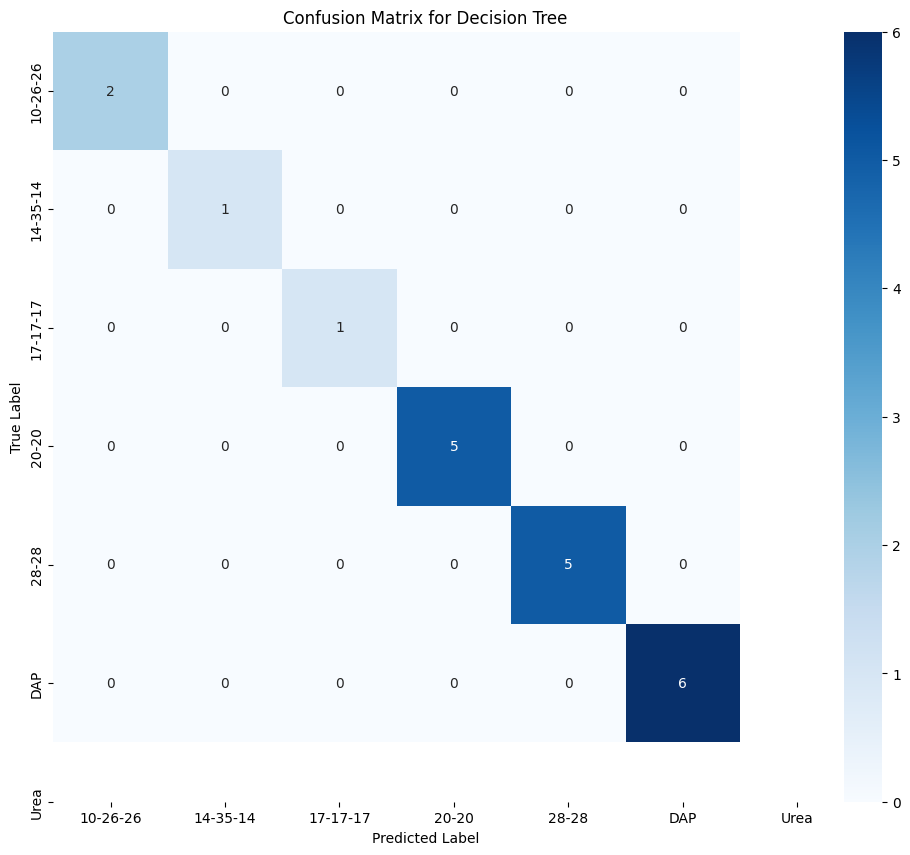

In [46]:
# Confusion Matrix for the best model
cm = confusion_matrix(y_test_encoded, y_pred_best)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 8. Save the Best Model, Scaler, and Label Encoder


In [47]:
# Save the trained best model
model_filename = 'best_fertilizer_model.sav'
pickle.dump(best_model, open(model_filename, 'wb'))
print(f"\nBest model saved as {model_filename}")


Best model saved as best_fertilizer_model.sav


In [48]:
# Save the fitted scaler
scaler_filename = 'fertilizer_scaler.sav'
pickle.dump(scaler, open(scaler_filename, 'wb'))
print(f"Scaler saved as {scaler_filename}")

Scaler saved as fertilizer_scaler.sav


In [49]:
# Save the label encoder classes
label_encoder_filename = 'fertilizer_label_encoder.sav'
pickle.dump(label_encoder, open(label_encoder_filename, 'wb'))
print(f"Label encoder saved as {label_encoder_filename}")

Label encoder saved as fertilizer_label_encoder.sav


In [50]:
# Save the list of columns (including one-hot encoded ones)
columns_filename = 'fertilizer_columns.sav'
pickle.dump(X.columns.tolist(), open(columns_filename, 'wb'))
print(f"Columns list saved as {columns_filename}")

Columns list saved as fertilizer_columns.sav


## 9. Load Saved Components and Make Predictions


In [51]:
# Example of how to load the saved model, scaler, label encoder, and columns for new predictions
# Load the model
loaded_model = pickle.load(open('best_fertilizer_model.sav', 'rb'))

# Load the scaler
loaded_scaler = pickle.load(open('fertilizer_scaler.sav', 'rb'))

# Load the label encoder
loaded_label_encoder = pickle.load(open('fertilizer_label_encoder.sav', 'rb'))

# Load the columns list
loaded_columns = pickle.load(open('fertilizer_columns.sav', 'rb'))

In [52]:
# Example prediction with new data (replace with your input values)
# temperature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorous
# soil_type and crop_type should be strings like 'Sandy', 'Maize', etc.
new_data_input = {
    'temperature': 26,
    'humidity': 52,
    'moisture': 38,
    'soil_type': 'Sandy',
    'crop_type': 'Maize',
    'nitrogen': 37,
    'potassium': 0,
    'phosphorous': 0
}

In [53]:
# Create a DataFrame from the new data input
new_data_df = pd.DataFrame([new_data_input])

# Apply one-hot encoding to the new data, aligning with the training columns
new_data_df = pd.get_dummies(new_data_df, columns=['soil_type', 'crop_type'], drop_first=True)

# Ensure the new data DataFrame has the same columns as the training data
# Add missing columns with a value of 0
for col in loaded_columns:
    if col not in new_data_df.columns:
        new_data_df[col] = 0

# Reorder columns to match the training data order
new_data_df = new_data_df[loaded_columns]

In [54]:
# Scale the numerical features in the new data
# Ensure the numerical features list used here matches the one used during training
numerical_features_for_scaling = ['temperature', 'humidity', 'moisture', 'nitrogen', 'potassium', 'phosphorous']
new_data_df[numerical_features_for_scaling] = loaded_scaler.transform(new_data_df[numerical_features_for_scaling])

# Make a prediction
predicted_label_encoded = loaded_model.predict(new_data_df)

# Decode the predicted label
predicted_label = loaded_label_encoder.inverse_transform(predicted_label_encoded)

print(f"\n New data Input :- {new_data_input} ")

print(f"\n\nPrediction for new data :- {predicted_label[0]}")



 New data Input :- {'temperature': 26, 'humidity': 52, 'moisture': 38, 'soil_type': 'Sandy', 'crop_type': 'Maize', 'nitrogen': 37, 'potassium': 0, 'phosphorous': 0} 


Prediction for new data :- Urea


In [55]:
import sklearn
print(sklearn.__version__)

1.6.1
